В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [31]:
cars_df = pd.read_csv('cars.csv')

cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [32]:
# num of (rows, columns) in the dataframe
cars_df.shape

(100, 13)

**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [33]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
#?pd.DataFrame.info

In [34]:
cars_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [35]:
print(f'Num of numeric columns: {len(cars_df.select_dtypes(include='int').columns)}')
print(f'Num of non-numeric columns: {len(cars_df.select_dtypes(include='object').columns)}')

Num of numeric columns: 8
Num of non-numeric columns: 5


In [36]:
# number of unique values in categorical columns
cars_df.select_dtypes(include='object').nunique()

,0
Brand,11
Model,58
Fuel_Type,2
Transmission,2
Owner_Type,3


In [37]:
# values of Owner_Type:
cars_df.Owner_Type.value_counts()

,count
Owner_Type,
First,44
Second,43
Third,13


In [38]:
# check exact data types stored in columns of object data type
for column in cars_df.columns:
  print(f"Data type of column {cars_df[column].name}: {type(cars_df[column].loc[0])}")

Data type of column Car_ID: <class 'numpy.int64'>
Data type of column Brand: <class 'str'>
Data type of column Model: <class 'str'>
Data type of column Year: <class 'numpy.int64'>
Data type of column Kilometers_Driven: <class 'numpy.int64'>
Data type of column Fuel_Type: <class 'str'>
Data type of column Transmission: <class 'str'>
Data type of column Owner_Type: <class 'str'>
Data type of column Mileage: <class 'numpy.int64'>
Data type of column Engine: <class 'numpy.int64'>
Data type of column Power: <class 'numpy.int64'>
Data type of column Seats: <class 'numpy.int64'>
Data type of column Price: <class 'numpy.int64'>


**Висновок:**
В наборі даних міститься 100 спостережень (точок даних, рядків) кожне з яких описане через 13 характеристик (колонок).
Типи зарактеристик:
- 8 числових (включно з `Car_ID`): усі з них цілочисельні (integer)
- 5 нечислових (категоріальних): усі типу string, з них:
  - 2 бінарні: `Fuel_Type` (Petrol/Diesel) та `Transmission` (Manual/Auromatic),
  - 1 мультикатегоріальна впорядкована (ordered): `Owner_Type` (First/Second/Third),
  - 2 мультикатегоріальні невпорядковані: `Brand` (11 значень), `Model` (58 значень).


**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [39]:
# define data for input
colnames = cars_df.columns
inputs = cars_df[colnames[0:(len(colnames)-1)]]

# define data for target
targets = cars_df.Price

# split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [40]:
# Fuel_Type
X_train.Fuel_Type.value_counts()

,count
Fuel_Type,
Petrol,41
Diesel,39


In [41]:
# encoding for Fuel_Type
fuel_type_codes = {'Petrol': 1, 'Diesel': 0} # define map
X_train['Fuel_Type_Codes'] = X_train.Fuel_Type.map(fuel_type_codes)
X_test['Fuel_Type_Codes'] = X_test.Fuel_Type.map(fuel_type_codes)

display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1


(None, None)

In [42]:
# Transmission
X_train.Transmission.value_counts()

,count
Transmission,
Automatic,49
Manual,31


In [43]:
# encoding for Transmission
transmission_codes = {'Automatic': 1, 'Manual': 0}

X_train['Transmission_Codes'] = X_train.Transmission.map(transmission_codes)
X_test['Transmission_Codes'] = X_test.Transmission.map(transmission_codes)

display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Codes,Transmission_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Codes,Transmission_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0


(None, None)

In [44]:
# Brand
X_train.Brand.value_counts()

,count
Brand,
Tata,10
BMW,9
Mercedes,9
Ford,9
Audi,8
Toyota,8
Volkswagen,7
Hyundai,6
Maruti,5


In [45]:
# setting encoder for Brand
one_hot_enc = preprocessing.OneHotEncoder()
one_hot_enc.fit(X_train[['Brand']])

OneHotEncoder()

In [46]:
# add encoded Brand to train and test data
X_train[one_hot_enc.categories_[0]] = one_hot_enc.transform(X_train[['Brand']]).toarray()
X_test[one_hot_enc.categories_[0]] = one_hot_enc.transform(X_test[['Brand']]).toarray()

pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Codes,Transmission_Codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Codes,Transmission_Codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(None, None)

In [47]:
# Owner_Type
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [48]:
#pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Codes,Transmission_Codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Codes,Transmission_Codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

Додаткове завдання: колонка `Model`

На мій погляд тут може бути декілька варіантів групування, наприклад: за типом кузова (SUV, Hatchback etc.) або за кількістю дверей для пасажирів (2, 3, 4, 5).
Я пробувала згрупувати моделі авто за типом їх кузова (`Body_Style`). Дані про ці типи спробувала взяти з каггла. Підгрущилось десь у районі половини. Не виконала до кінця через відсутність часу, але згодом хочу доробити.

In [50]:
# Model
cars_df[['Brand','Model']].value_counts()

Brand       Model        
Ford        Mustang          3
Hyundai     Verna            3
Mercedes    C-Class          3
Tata        Altroz           3
BMW         7 Series         2
            3 Series         2
            X5               2
Audi        A6               2
            Q7               2
            A3               2
Hyundai     Santro           2
            Elantra          2
Honda       WR-V             2
            BR-V             2
Ford        EcoSport         2
            Ranger           2
Mercedes    GLE              2
            GLA              2
Mahindra    XUV300           2
            Thar             2
Mercedes    E-Class          2
Maruti      S-Cross          2
Hyundai     Venue            2
Ford        Aspire           2
BMW         X3               2
Audi        A5               2
Volkswagen  T-Roc            2
            Vento            2
            Passat           2
Toyota      Innova Crysta    2
            Yaris            2
Volkswagen  Ameo             2
Tata        Tiago            2
            Safari           2
Toyota      Camry            2
Tata        Tigor            2
Maruti      Vitara           2
Toyota      Fortuner         2
Audi        A4               1
            Q3               1
BMW         5 Series         1
            X1               1
Hyundai     Sonata           1
            Creta            1
Honda       City             1
            Civic            1
Ford        Figo             1
            Endeavour        1
Mahindra    Scorpio          1
Maruti      Swift            1
Tata        Harrier          1
Mercedes    GLC              1
Maruti      Ertiga           1
Tata        Nexon            1
Toyota      Innova           1
            Corolla          1
Volkswagen  Polo             1
            Tiguan           1
Name: count, dtype: int64

In [51]:
cars_kaggle_df = pd.read_csv('cars-kaggle.csv')

/tmp/ipython-input-3171571695.py:1: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  cars_kaggle_df = pd.read_csv('cars-kaggle.csv')


In [52]:
cars_kaggle_df[['Company','Serie']].value_counts()

Company        Serie                                  
BMW            3 Series Sedan                             265
               5 Series Sedan                             252
               3 Series Touring                           216
MERCEDES BENZ  E-Klasse and predecessors                  212
AUDI           A4                                         207
                                                         ... 
PORSCHE        Speedster                                    1
               Panamera Turbo Sport Turismo                 1
               Panamera Turbo S Sport Turismo               1
               Panamera Turbo S E-Hybrid Sport Turismo      1
               Panamera Turbo S E-Hybrid                    1
Name: count, Length: 2836, dtype: int64

In [53]:
def find_body_style(row):
    matches = cars_kaggle_df[
        (cars_kaggle_df["Company"] == row["Brand1"]) &
        (cars_kaggle_df["Serie"].str.contains(row["Model1"], na=False))
    ]

    if not matches.empty:
        return matches.iloc[0]["Body style"]

    return None

In [54]:
test = X_train.copy()

In [55]:
test["Brand1"] = test["Brand"].str.lower().str.strip()
test["Model1"] = test["Model"].str.lower().str.strip()

cars_kaggle_df["Company"] = cars_kaggle_df["Company"].str.lower().str.strip()
cars_kaggle_df["Serie"] = cars_kaggle_df["Serie"].str.lower().str.strip()

In [56]:
test['Body_style'] = test.apply(find_body_style, axis=1)

In [57]:
test[['Brand', 'Model', 'Body_style']]

,Brand,Model,Body_style
83,Volkswagen,T-Roc,SUV (Sports Utility Vehicle)
55,Audi,A5,Hatchback
26,Audi,A6,"Wagon (station wagon, estate, combi, touring)"
54,Volkswagen,Vento,NaN
19,Mercedes,GLC,None
...,...,...,...
3,Maruti,Swift,None
2,Ford,Mustang,"Convertible (spider/spyder, cabrio/cabriolet, ..."
6,Mahindra,Scorpio,SUV (Sports Utility Vehicle)
27,BMW,X3,SUV (Sports Utility Vehicle)


In [58]:
test.Body_style.unique()

array(['SUV (Sports Utility Vehicle)', 'Hatchback',
       'Wagon (station wagon, estate, combi, touring)', nan, None,
       'Convertible (spider/spyder, cabrio/cabriolet, drop/open/soft top)',
       'Truck'], dtype=object)

In [59]:
test[test['Body_style'].isna()]

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Codes,Transmission_Codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Brand1,Model1,Body_style
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,volkswagen,vento,NaN
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,mercedes,glc,None
57,58,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,mercedes,c-class,None
23,24,Tata,Altroz,2020,18000,Petrol,Manual,First,20,1199,85,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,tata,altroz,None
91,92,Mahindra,XUV300,2019,26000,Diesel,Manual,Second,20,1497,115,5,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,mahindra,xuv300,None
81,82,Maruti,S-Cross,2020,15000,Petrol,Automatic,Second,18,1462,103,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,maruti,s-cross,None
90,91,Tata,Tiago,2020,18000,Petrol,Manual,First,23,1199,84,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,tata,tiago,None
38,39,Mercedes,GLE,2018,26000,Petrol,Automatic,Second,12,2996,362,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,mercedes,gle,None
10,11,Mercedes,C-Class,2018,28000,Petrol,Automatic,First,16,1991,181,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,mercedes,c-class,None
28,29,Mercedes,E-Class,2017,30000,Diesel,Automatic,First,16,1950,191,5,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,mercedes,e-class,None


In [60]:
test.Body_style.isnull().sum()

np.int64(46)

In [61]:
cars_kaggle_df[cars_kaggle_df['Serie'].str.contains('glc')]

,Unnamed: 0,Model,Serie,Company,Body style,Segment,Production years,Cylinders,Displacement,Power(HP),Power(BHP),Power(KW),Torque(lb-ft),Torque(Nm),Electrical motor power,Electrical motor torque,Fuel System,Fuel,Fuel capacity,Top Speed,Acceleration 0-62 Mph (0-100 kph),Drive Type,Gearbox,Front brake,Rear brake,Tire Size,Length,Width,Height,Front/rear Track,Wheelbase,Ground Clearance,Aerodynamics (Cd),Aerodynamics (frontal area),Turning circle,Cargo Volume,Unladen Weight,Gross Weight Limit,Combined mpg,City mpg,Highway mpg,CO2 Emissions,CO2 Emissions (Combined),Turning circle (curb to curb),Total maximum power,Power pack,Nominal Capacity,Top speed (electrical),EV Range,High mpg,Extra high mpg,Medium mpg,Low mpg,Total maximum torque,Maximum Capacity,Specification summary
15362,15362,2024 Mercedes-Benz GLC Coupe,glc class coupe,mercedes benz,SUV (Sports Utility Vehicle),Medium SUV,2023,L4,1999 cm3,204 HP @ 6100 RPM,201 BHP @ 6100 RPM,150 KW @ 6100 RPM,NaN,NaN,16.9 kw (23 hp),147.5 lb-ft (200 Nm),Turbocharged Direct Injection,Mild Hybrid,NaN,141 mph (227 km/h),7.9 s,All Wheel Drive,9-speed automatic (9G-TRONIC),Ventilated Discs,Ventilated Discs,NaN,187.5 in (4763 mm),74.4 in (1890 mm),NaN,"64.1/64.6 in (1,628/1,641 mm)",NaN,NaN,0.27,NaN,35.8 ft (10.9 m),19.2 cuFT (544 L),NaN,NaN,29.4 mpg US (8 L/100Km),NaN,NaN,NaN,182 g/km,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200 4MATIC 9AT AWD (204 HP)
15363,15363,2024 Mercedes-Benz GLC Coupe,glc class coupe,mercedes benz,SUV (Sports Utility Vehicle),Medium SUV,2023,L4,1999 cm3,258 HP @ 5800 RPM,255 BHP @ 5800 RPM,189.8 KW @ 5800 RPM,295 lb-ft @ - RPM,400 Nm @ - RPM,16.9 kw (23 hp),147.5 lb-ft (200 Nm),Turbocharged Direct Injection,Mild Hybrid,NaN,153 mph (246 km/h),6.3 s,All Wheel Drive,9-speed automatic (9G-TRONIC),Ventilated Discs,Ventilated Discs,NaN,187.5 in (4763 mm),74.4 in (1890 mm),NaN,"64.1/64.6 in (1,628/1,641 mm)",NaN,NaN,0.27,NaN,35.8 ft (10.9 m),19.2 cuFT (544 L),NaN,NaN,28.7 mpg US (8.2 L/100Km),NaN,NaN,NaN,185 g/km,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300 4MATIC 9AT AWD (258 HP)
15364,15364,2024 Mercedes-Benz GLC Coupe,glc class coupe,mercedes benz,SUV (Sports Utility Vehicle),Medium SUV,2023,L4,1993 cm3,197 HP @ 3600 RPM,194 BHP @ 3600 RPM,144.9 KW @ 3600 RPM,325 lb-ft @ - RPM,440 Nm @ - RPM,16.9 kw (23 hp),147.5 lb-ft (200 Nm),Turbocharged Common Rail,Mild Hybrid Diesel,NaN,140 mph (225 km/h),8.1 s,All Wheel Drive,9-speed automatic (9G-TRONIC),Ventilated Discs,Ventilated Discs,NaN,187.5 in (4763 mm),74.4 in (1890 mm),NaN,"64.1/64.6 in (1,628/1,641 mm)",NaN,NaN,0.27,NaN,35.8 ft (10.9 m),19.2 cuFT (544 L),NaN,NaN,40.6 mpg US (5.8 L/100Km),NaN,NaN,NaN,152 g/km,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,220d 4MATIC 9AT AWD (197 HP)
15365,15365,2024 Mercedes-Benz GLC Coupe,glc class coupe,mercedes benz,SUV (Sports Utility Vehicle),Medium SUV,2023,L4,1993 cm3,269 HP @ 4200 RPM,265 BHP @ 4200 RPM,197.8 KW @ 4200 RPM,406 lb-ft @ - RPM,550 Nm @ - RPM,16.9 kw (23 hp),147.5 lb-ft (200 Nm),Turbocharged Common Rail,Mild Hybrid Diesel,NaN,155 mph (249 km/h),6.4 s,All Wheel Drive,9-speed automatic (9G-TRONIC),Ventilated Discs,Ventilated Discs,NaN,187.5 in (4763 mm),74.4 in (1890 mm),NaN,"64.1/64.6 in (1,628/1,641 mm)",NaN,NaN,0.27,NaN,35.8 ft (10.9 m),19.2 cuFT (544 L),NaN,NaN,38.6 mpg US (6.1 L/100Km),NaN,NaN,NaN,160 g/km,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300d 4MATIC 9AT AWD (269 HP)
15366,15366,2024 Mercedes-Benz GLC Coupe,glc class coupe,mercedes benz,SUV (Sports Utility Vehicle),Medium SUV,2023,L4,1993 cm3,197 HP @ 3600 RPM,194 BHP @ 3600 RPM,144.9 KW @ 3600 RPM,325 lb-ft @ 1800-2800 RPM,440 Nm @ 1800-2800 RPM,100 kw (136 hp),324.5 lb-ft (440 Nm),Turbocharged Common Rail,Plug-in Hybrid,NaN,136 mph (219 km/h),6.4 s,All Wheel Drive,9-speed automatic (9G-TRONIC),Ventilated Discs,Ventilated Discs,NaN,187.5 in (4763 mm),74.4 in (1890 mm),NaN,"64.1/64.6 in (1,628/1,641 mm)",NaN,NaN,0.27,NaN,35.8 ft (10.9 m),13.8 cuFT (391 L),NaN,NaN,38.6 mpg US (6.1 L/100K

In [63]:
test.Body_style.value_counts()

,count
Body_style,
SUV (Sports Utility Vehicle),15
Hatchback,7
"Wagon (station wagon, estate, combi, touring)",7
"Convertible (spider/spyder, cabrio/cabriolet, drop/open/soft top)",3
Truck,2


**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [66]:
cars_df_numeric = X_train.select_dtypes(include='number') # select numeric columns
cars_df_numeric = pd.concat([cars_df_numeric, y_train], axis=1) # add target values to the dataframe

display(cars_df_numeric.head())

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Codes,Transmission_Codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Price
83,84,2019,22000,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1600000
55,56,2018,28000,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2600000
26,27,2018,28000,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3200000
54,55,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,650000
19,20,2017,26000,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2500000


In [67]:
# correlation matrix
corr_matrix = cars_df_numeric.corr()

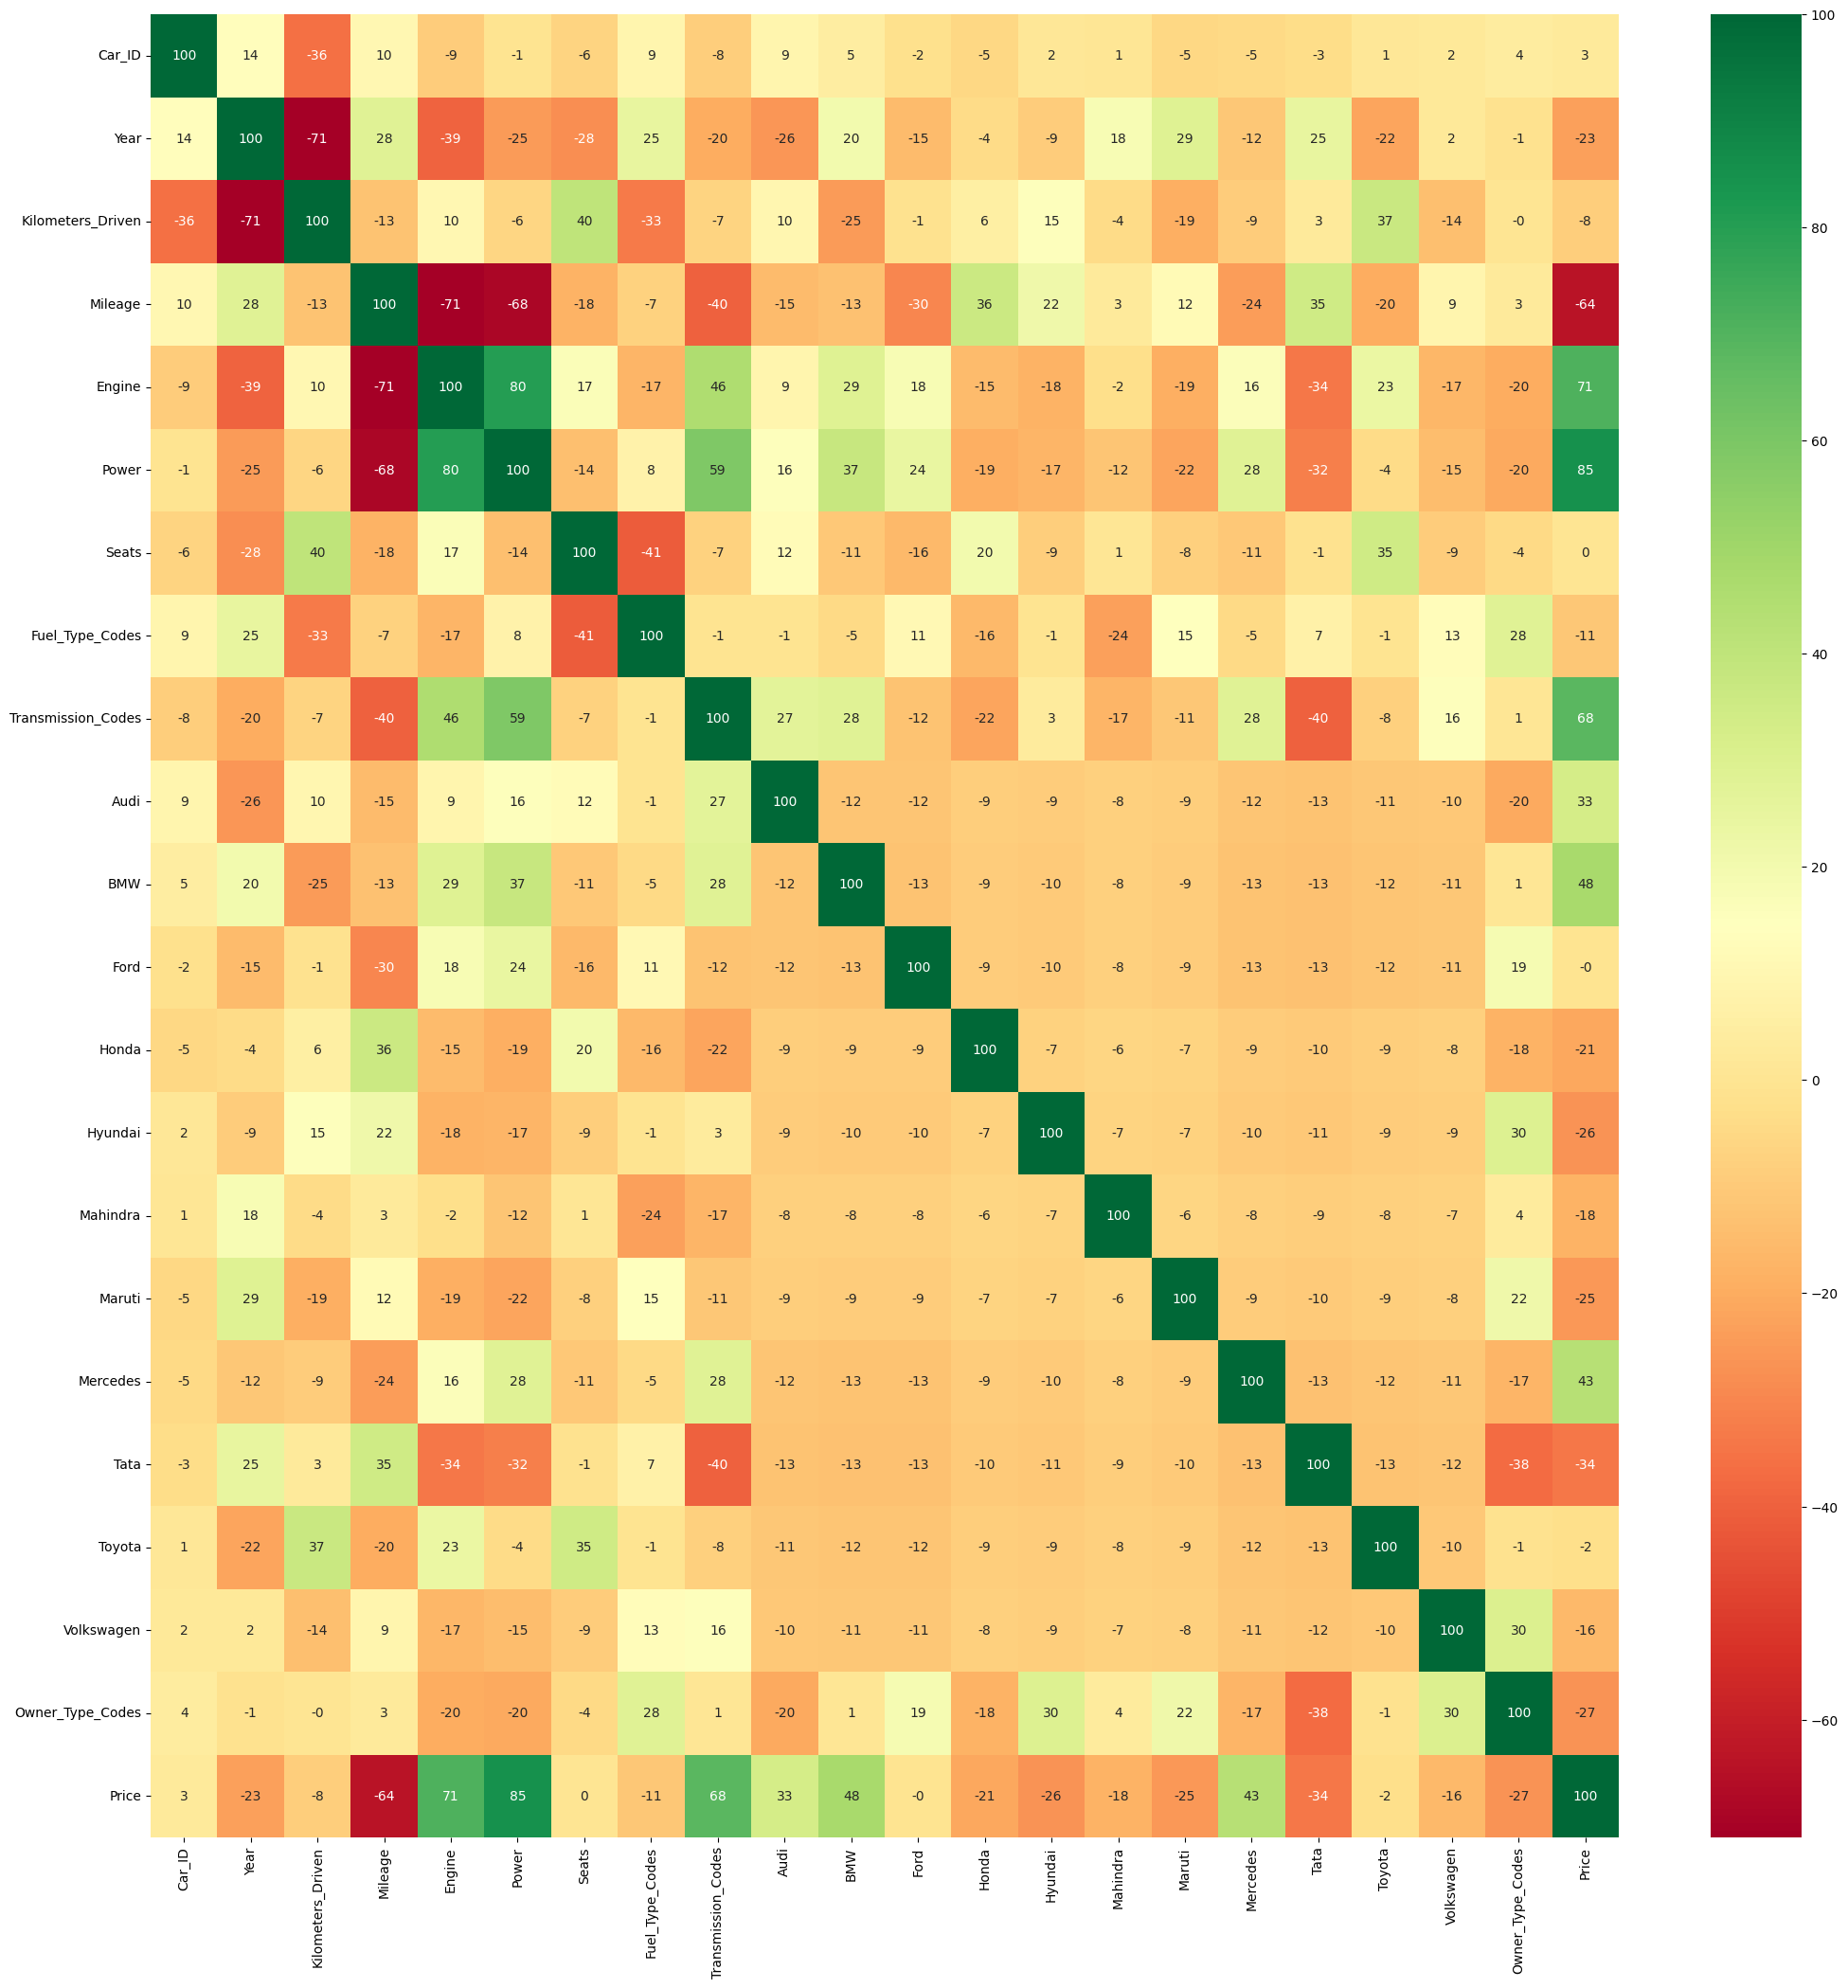

In [68]:
# corelation matrix representation
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_matrix*100, annot = True, cmap = "RdYlGn", cbar = True, fmt='.0f')
plt.show()

**Висновок:** Є декілька характеристик, які сильно корелюють з цільовою змінною. Значна позитивна кореляція цільової змінної спостерігається з характеристиками `Engine`(0.71), `Power`(0.85), `Transmission_Codes`(0.68). Значна негативна кореляція цільової змінної спостерігається тільки з характеристикою`Mileage`(-0.64).

Інші спостереження з матриці кореляції: присутня сильна негативна кореляція між `Year` так `Kilometers_Driven` що є логічним, бо чим менший рік випуску (== старіше авто) тим більший кілометраж. `Mileage` має сильну негативну кореляцію з `Engine` та `Power`, що означає що автомобілі з більшим об'ємом двигуна та/або більшою потужністю споживають менше палива на один кілометр. Також сильна позитивна  кореляція між `Engine` та `Power` є очікуваною, бо чим більший двигун тим потужніший автомобіль. Сильна позитивна колеряція між `Transmission_Code` та `Power`, говорить про те, що авта з автоматичною коробкою передач (`Transmission_Code`=1) є більш потужними з огляду на наші дані.


**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [69]:
# leave only numeric columns in X_train and X_test
X_train = X_train.select_dtypes(include='number')
X_test = X_test.select_dtypes(include='number')

display(X_train.head()), display(X_test.head())

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Codes,Transmission_Codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,2019,22000,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,2018,28000,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,2018,28000,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,2017,26000,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Codes,Transmission_Codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,2016,38000,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,2019,26000,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,2020,18000,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,2019,26000,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

In [70]:
# create and train linear regression model
model = LinearRegression()
model = model.fit(X_train, y_train)

In [71]:
model.coef_, model.intercept_

(array([ 1.98416545e+02, -7.82119090e+03, -1.02947768e+01, -3.86171285e+04,
        -3.25522637e+01,  6.10107135e+03, -2.89925704e+03, -3.67810997e+05,
         2.39529366e+05,  7.56997386e+05,  7.31220833e+05, -3.02439927e+05,
        -1.87580541e+05, -5.06581958e+05, -5.75037200e+05, -3.92102822e+05,
         7.36415668e+05, -1.27890334e+05,  1.24349231e+05, -2.57350336e+05,
         6.47639895e+04]),
 np.float64(17387451.056001596))

In [72]:
# make prediction of target for train data
X_train_predict = model.predict(X_train)
X_train_predict_loss = np.sqrt(mean_squared_error(y_train, X_train_predict))

print(f'Prediction for TRAIN data: loss func. value: {X_train_predict_loss}')

Prediction for TRAIN data: loss func. value: 210293.57828151877


In [73]:
# make prediction of target for test data
X_test_predict = model.predict(X_test)
X_test_predict_loss = np.sqrt(mean_squared_error(y_test, X_test_predict))

print(f'Prediction for TEST data: loss func. value: {X_test_predict_loss}')

Prediction for TEST data: loss func. value: 258181.56112032934


In [74]:
# check std of target (overall) in order to understand if Loss value is acceptable
cars_df.Price.std()

1000264.6114550354

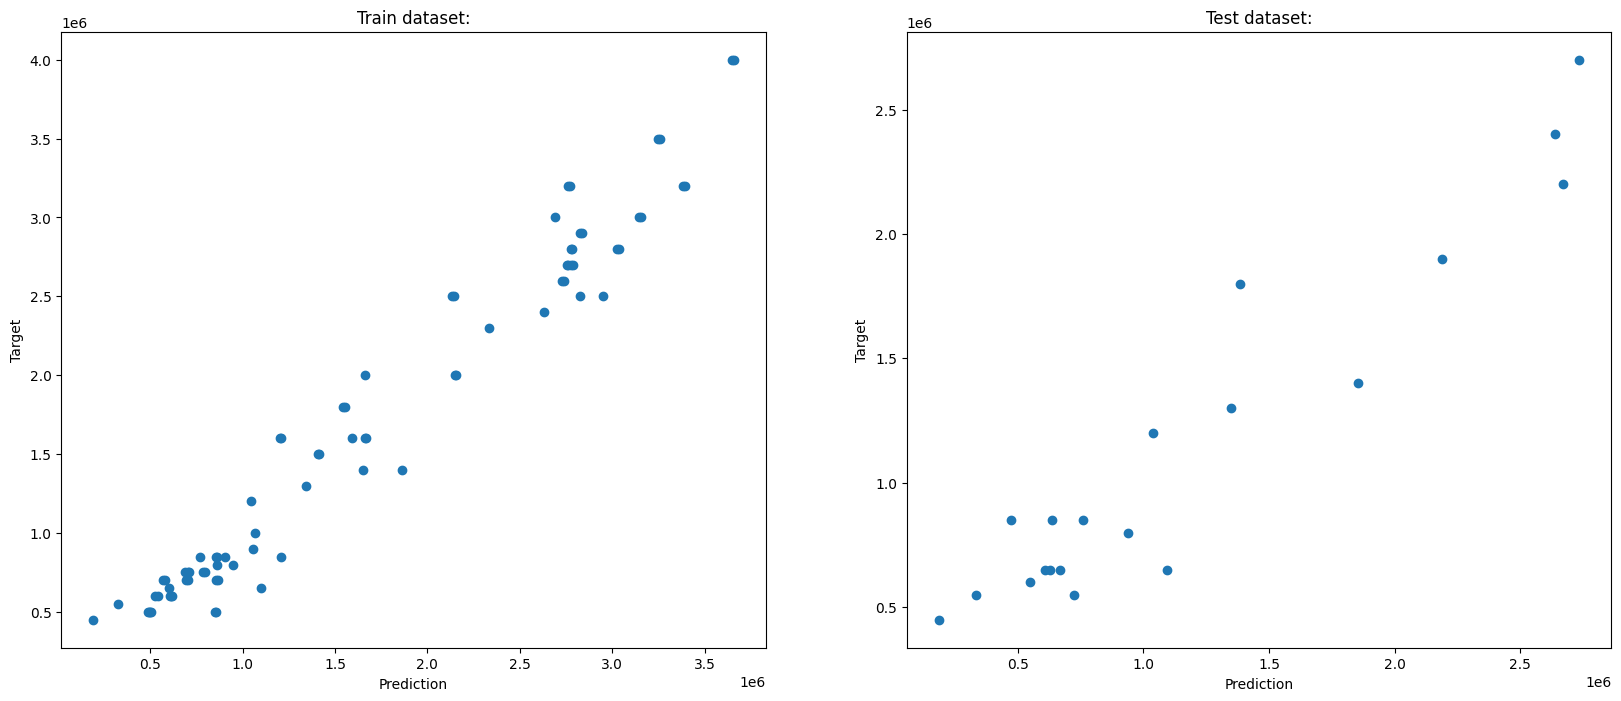

In [75]:
plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
plt.plot(X_train_predict, y_train,'o')
plt.title('Train dataset:')
plt.xlabel('Prediction')
plt.ylabel('Target')

plt.subplot(1,2,2)
plt.plot(X_test_predict, y_test,'o')
plt.title('Test dataset:')
plt.xlabel('Prediction')
plt.ylabel('Target')

plt.show()


**Висновок:**
Загалом дана модель може робити достатньо якісні передбачення у
випадку цих конкретних навчальних і тренувальних даних.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [76]:
# set standard scaler for the data
std_scaler = StandardScaler()
std_scaler.fit(X_train)

StandardScaler()

In [77]:
# scale features in train and test datasets
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

In [78]:
# create and train linear regression model on scaled data
model_scaled = LinearRegression()
model_scaled = model.fit(X_train_scaled, y_train)

In [79]:
model_scaled.coef_, model_scaled.intercept_

(array([   5608.68542149,   -8765.64571392,  -94398.72148597,
        -131715.51202972,  -21377.45333789,  496769.21489874,
          -2148.92454899, -183848.01890892,  116693.76820576,
         205600.14776875,  208407.31378257, -118209.45031066,
         -62753.005386  , -152304.86391146, -140945.16290405,
        -112259.96701985,  210048.78114763,  -65996.24697212,
          15805.70151142,  -92968.2600652 ,   42344.95281544]),
 np.float64(1680000.0000000002))

In [80]:
# make prediction of target for train data
X_train_scaled_predict = model_scaled.predict(X_train_scaled)
X_train_scaled_predict_loss = np.sqrt(mean_squared_error(y_train, X_train_scaled_predict))

print(f'Prediction for scaled train data: loss func. value: {X_train_scaled_predict_loss}')

Prediction for scaled train data: loss func. value: 210293.57828151854


In [81]:
# coefficients of the model
model_scaled.coef_, model_scaled.intercept_

(array([   5608.68542149,   -8765.64571392,  -94398.72148597,
        -131715.51202972,  -21377.45333789,  496769.21489874,
          -2148.92454899, -183848.01890892,  116693.76820576,
         205600.14776875,  208407.31378257, -118209.45031066,
         -62753.005386  , -152304.86391146, -140945.16290405,
        -112259.96701985,  210048.78114763,  -65996.24697212,
          15805.70151142,  -92968.2600652 ,   42344.95281544]),
 np.float64(1680000.0000000002))

In [82]:
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [83]:
# coefficients vs. features
weights_linreg = pd.DataFrame({
    'feature': np.append(X_train.columns.to_list(),1),
    'weight': np.append(model_scaled.coef_, model_scaled.intercept_)
})
weights_linreg.sort_values('weight', ascending=False)

,feature,weight
21,1,1.680000e+06
5,Power,4.967692e+05
16,Mercedes,2.100488e+05
10,BMW,2.084073e+05
9,Audi,2.056001e+05
8,Transmission_Codes,1.166938e+05
20,Owner_Type_Codes,4.234495e+04
18,Toyota,1.580570e+04
0,Car_ID,5.608685e+03
6,Seats,-2.148925e+03


Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

**Висновок:**
Згідно коефіцієнтів натренованої моделі, найвпливовішими ознаками на формування передбачення цільової змінної є:
- Вищі показники `Power` збільшують ціну за авто (цільову змінну), що є логічним,
- Такі марки як `Mercedes`, `BMW`, `Audi` задають тенденцію до збльшення цільової змінної. У той же час марки `Hundai`, `Mahindra`, `Ford`, `Maruti` коштуватимуть тенденційно менше. Обидві тенденції виглядають логічними, зважаючи на те, що перші марки авто мають лінійки автомобілів представницького класу і класу люкс.
- Значення Automatic (1) характеристики `Transmission_Code` потенційно впливає на цільову змінну у напрямку збільшення, що теж є доволі логічним.
- Значення Petrol(1) характеристики `Fuel_Type_Code` може негативно впливати на цільову змінну (Petrol=1/Diesel=0)
- `Mileage` впливає на цільову змінну у напрямку зменшення, тобто, чим більше авто споживає палива за кілометр, тим дешевше воно коштує, що виглядає логічним, так як таке авто являється менш економічним.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [118]:
# prepare input data
input_df = pd.DataFrame(X_train_scaled)
input_df.columns = X_train.columns # names of columns as in original DataFrame
input_df.index = X_train.index # indices as in original DataFrame

input_df = sm.add_constant(input_df) # add constant term to input

In [120]:
# setup and train model
model_ols = sm.OLS(y_train, input_df) # ordinary least squares
X_train_scaled_predict_ols = model_ols.fit()

display(X_train_scaled_predict_ols.params)

,0
const,1.680000e+06
Car_ID,5.608685e+03
Year,-8.765646e+03
Kilometers_Driven,-9.439872e+04
Mileage,-1.317155e+05
Engine,-2.137745e+04
Power,4.967692e+05
Seats,-2.148925e+03
Fuel_Type_Codes,-1.838480e+05
Transmission_Codes,1.166938e+05


In [121]:
# report
print(X_train_scaled_predict_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     68.35
Date:                Sun, 15 Feb 2026   Prob (F-statistic):           2.01e-33
Time:                        20:44:32   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      59   BIC:                             2280.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.68e+06   2.74

**Висновок:**

Статистично значущі ознаки:
- константа
- `Mileage` (p-value = 0.028)
- `Power` (p-value = 0.000)
- `Fuel_Type_Codes` (p-value = 0.000)
- `Transmission_Codes` (p-vaue = 0.010)
- `Audi` (p-value = 0.000)
- `BMW` (p-value = 0.000)
- `Ford` (p-value = 0.001)
- `Hyundai` (p-value = 0.000)
- `Mahindra` (p-value = 0.000)
- `Maruti` (p-value = 0.000)
- `Mercedes` (p-value = 0.000)
- `Volkswagen` (p-value = 0.003)

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [124]:
# prepare input
input_df_stat_signif = input_df[['const', 'Mileage', 'Power', 'Fuel_Type_Codes', 'Transmission_Codes', 'Audi', 'BMW', 'Ford', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Volkswagen']] # filter stat. significant features (p-value >= 0.05)
input_df_stat_signif.head()

,const,Mileage,Power,Fuel_Type_Codes,Transmission_Codes,Audi,BMW,Ford,Hyundai,Mahindra,Maruti,Mercedes,Volkswagen
83,1.0,0.274862,-0.231967,0.975305,0.795395,-0.333333,-0.356034,-0.356034,-0.284747,-0.229416,-0.258199,-0.356034,3.229330
55,1.0,-0.018324,0.247012,-1.025320,0.795395,3.000000,-0.356034,-0.356034,-0.284747,-0.229416,-0.258199,-0.356034,-0.309662
26,1.0,-0.604696,0.910213,0.975305,0.795395,3.000000,-0.356034,-0.356034,-0.284747,-0.229416,-0.258199,-0.356034,-0.309662
54,1.0,0.274862,-0.784634,0.975305,-1.257237,-0.333333,-0.356034,-0.356034,-0.284747,-0.229416,-0.258199,-0.356034,3.229330
19,1.0,-1.484254,0.910213,0.975305,0.795395,-0.333333,-0.356034,-0.356034,-0.284747,-0.229416,-0.258199,2.808717,-0.309662


In [126]:
# setup and train model
model_ols_stat_signif = sm.OLS(y_train, input_df_stat_signif) # ordinary least squares
X_train_scaled_stat_signif_predict_ols = model_ols_stat_signif.fit()

display(X_train_scaled_stat_signif_predict_ols.params)

,0
const,1.680000e+06
Mileage,-1.430094e+05
Power,4.556152e+05
Fuel_Type_Codes,-1.337141e+05
Transmission_Codes,1.310778e+05
Audi,2.496895e+05
BMW,2.949781e+05
Ford,-4.855211e+04
Hyundai,-1.027479e+05
Mahindra,-8.538214e+04


In [127]:
# report
print(X_train_scaled_stat_signif_predict_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     109.4
Date:                Sun, 15 Feb 2026   Prob (F-statistic):           4.12e-39
Time:                        20:57:36   Log-Likelihood:                -1100.4
No. Observations:                  80   AIC:                             2227.
Df Residuals:                      67   BIC:                             2258.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.68e+06   2.78

**Висновки**

З використанням тільки статистично значущих характеристик, модель стала ще більш статистично значущою: p-value зменшилось з 2.01e-33 до 4.12e-39). Значення $ R^2 $ незначимо зменшилось з 0.959 до 0.951, але залишилось достатньо високим - нова модель пояснює 95.1% варіації у залежній змінній. Те саме стосується і $ Adj. R^2 $, що являється більш підходящим показником у випадку з кількома регресорами, значення якого незначно знизилось з 0.945 до 0.943.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 8 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 8? Яку модель з останніх 3х завдань ви б лишили для використання?

In [128]:
# prepare input
input_df_stat_signif2 = input_df[['const', 'Kilometers_Driven', 'Mileage', 'Power', 'Fuel_Type_Codes', 'Transmission_Codes', 'Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Volkswagen']] # filter stat. significant features (p-value >= 0.05)
input_df_stat_signif2.head()

,const,Kilometers_Driven,Mileage,Power,Fuel_Type_Codes,Transmission_Codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Volkswagen
83,1.0,-0.693871,0.274862,-0.231967,0.975305,0.795395,-0.333333,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,3.229330
55,1.0,-0.039533,-0.018324,0.247012,-1.025320,0.795395,3.000000,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.309662
26,1.0,-0.039533,-0.604696,0.910213,0.975305,0.795395,3.000000,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.309662
54,1.0,0.396692,0.274862,-0.784634,0.975305,-1.257237,-0.333333,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,3.229330
19,1.0,-0.257646,-1.484254,0.910213,0.975305,0.795395,-0.333333,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,2.808717,-0.377964,-0.309662


In [129]:
# setup and train model
model_ols_stat_signif2 = sm.OLS(y_train, input_df_stat_signif2) # ordinary least squares
X_train_scaled_stat_signif_predict_ols2 = model_ols_stat_signif2.fit()

display(X_train_scaled_stat_signif_predict_ols2.params)

,0
const,1.680000e+06
Kilometers_Driven,-7.887396e+04
Mileage,-1.213232e+05
Power,4.666618e+05
Fuel_Type_Codes,-1.629442e+05
Transmission_Codes,1.175415e+05
Audi,1.949556e+05
BMW,2.092733e+05
Ford,-1.139975e+05
Honda,-7.974914e+04


In [130]:
# report
print(X_train_scaled_stat_signif_predict_ols2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     97.03
Date:                Sun, 15 Feb 2026   Prob (F-statistic):           4.85e-38
Time:                        21:27:58   Log-Likelihood:                -1094.7
No. Observations:                  80   AIC:                             2221.
Df Residuals:                      64   BIC:                             2260.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.68e+06   2.65

**Висновок**

У порівнянні з первинною моделлю показники змінились незначимо:
- $R^2$: з 0.959 до 0.958
- $Adj. R^2$: 0.945 до 0.948
- p-value: з 2.01e-33 до 4.85e-38

З огляду на показники трьох моделей, я б використовувала скоріше за все останню модель з завдання 10. Вона дає кращі $Adj. R^2$ за дві інші моделі і друге найкраще p-value. Також вона включає важливу на мій погляд характеристику `Kilometers_Driven`, якої немає у другої моделі. З огляду на те, що, наприклад, у нових реальних даних можуть бути незнайомі нашій моделі марки авто, на мій погляд, перша модель, яка була на тренована на всіх характеристиках і має також гарні показники, також може бути доцільною для використання.
